In [15]:
import subprocess
import itertools
import pandas as pd
import os
import threading
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
# Check if results.csv exists and load existing results
if os.path.exists("C:\\inz\\GeneticSudokuSolver\\results.csv"):
    df_existing = pd.read_csv("C:\\inz\\GeneticSudokuSolver\\results.csv")
    results = df_existing.to_dict('records')
    last_run = df_existing.iloc[-1]
    last_combination = (last_run['sudoku_path'], last_run['population_size'], last_run['mutation_rate'], last_run['fittest_rate'], last_run['reset_counter'])
    last_iteration = last_run['iteration']
    print(f"Loaded {len(results)} existing results. Last run: {last_combination}, iteration {last_iteration}")
    start_iteration = last_iteration + 1
print(df_existing.head())

Loaded 3120 existing results. Last run: ('./testData/1mid.txt', 100, 0.1, 0.2, 100), iteration 20
           sudoku_path  population_size  mutation_rate  fittest_rate  \
0  ./testData/1mid.txt              100            0.1           0.2   
1  ./testData/1mid.txt              100            0.1           0.2   
2  ./testData/1mid.txt              100            0.1           0.2   
3  ./testData/1mid.txt              100            0.1           0.2   
4  ./testData/1mid.txt              100            0.1           0.2   

   reset_counter  preserve_selection  multimut_pop  multi_mut_coeff  \
0            100                True             2                3   
1            100                True             2                3   
2            100                True             2                3   
3            100                True             2                3   
4            100                True             2                3   

   mut_res_num  mut_res_coeff  fittest  cr

In [22]:

print(df_existing.head())
filtered_df = df_existing[df_existing['best_is_zero'] == False]

           sudoku_path  population_size  mutation_rate  fittest_rate  \
0  ./testData/1mid.txt              100            0.1           0.2   
1  ./testData/1mid.txt              100            0.1           0.2   
2  ./testData/1mid.txt              100            0.1           0.2   
3  ./testData/1mid.txt              100            0.1           0.2   
4  ./testData/1mid.txt              100            0.1           0.2   

   reset_counter  preserve_selection  multimut_pop  multi_mut_coeff  \
0            100                True             2                3   
1            100                True             2                3   
2            100                True             2                3   
3            100                True             2                3   
4            100                True             2                3   

   mut_res_num  mut_res_coeff  fittest  cross_mut  solver_type  iteration  \
0          150            0.7        1      False            0 

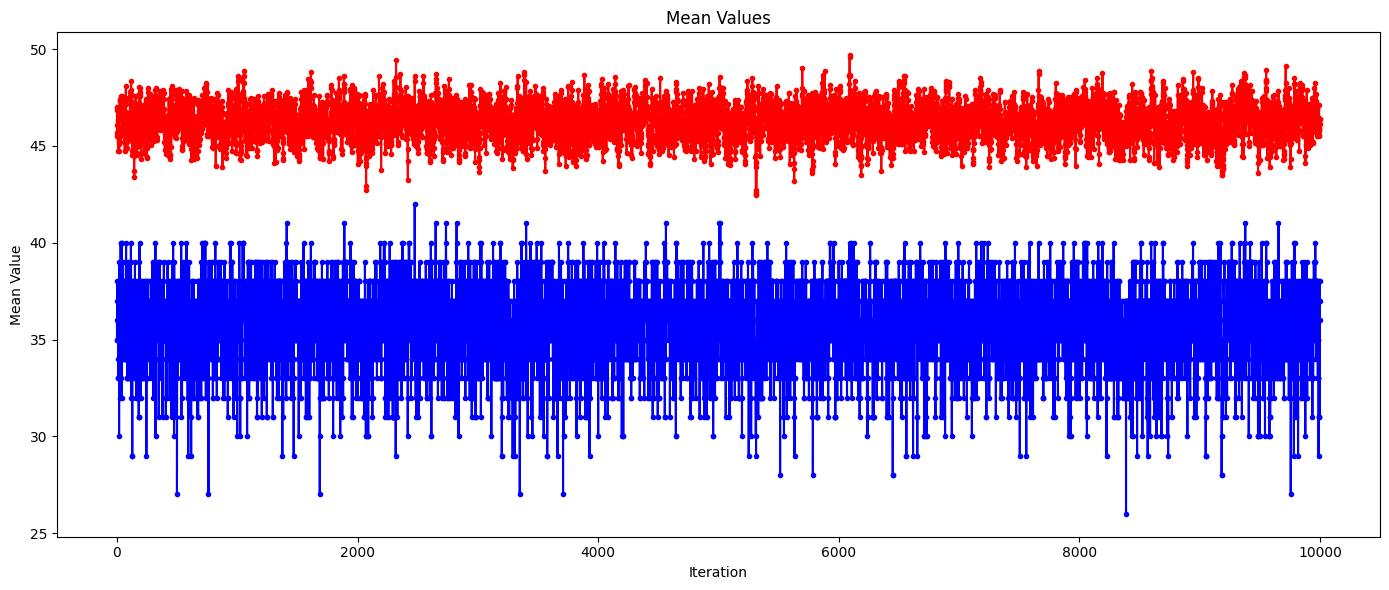

In [33]:
first_record = filtered_df.iloc[1]

# Extract best values and mean values
best_values = first_record['best_values']
mean_values = first_record['mean_values']

# Convert the string representation of lists to actual lists
import ast
best_values = ast.literal_eval(best_values)
mean_values = ast.literal_eval(mean_values)

# Create the plots
plt.figure(figsize=(14, 6))

# Plot best values
# plt.subplot(1, 2, 1)
plt.plot(best_values, marker='o', linestyle='-', color='b',markersize=3)
plt.title('Best Values')
plt.xlabel('Iteration')
plt.ylabel('Best Value')

# Plot mean values
# plt.subplot(1, 2, 2)
plt.plot(mean_values, marker='o', linestyle='-', color='r', markersize=3)
plt.title('Mean Values')
plt.xlabel('Iteration')
plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()

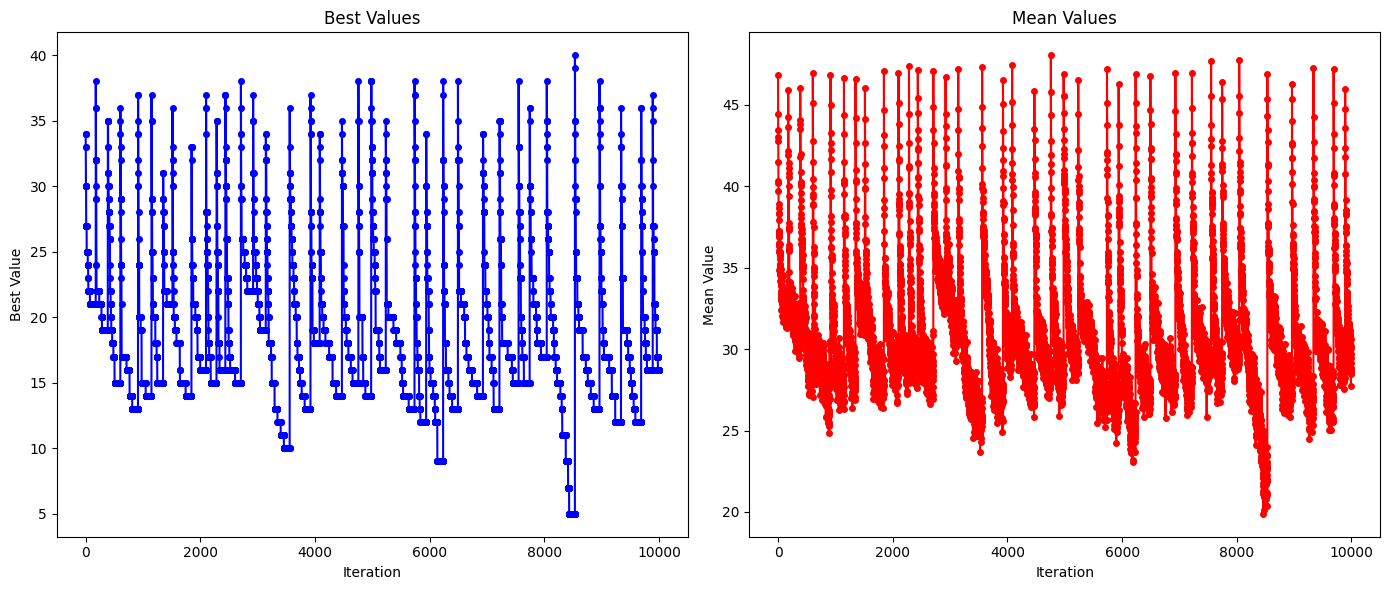

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load the DataFrame
df_existing = pd.read_csv("C:\\inz\\GeneticSudokuSolver\\results.csv")

# Find the record with the best best_values (lowest best value)
df_existing['best_values_list'] = df_existing['best_values'].apply(ast.literal_eval)
df_existing['min_best_value'] = df_existing['best_values_list'].apply(min)
best_record = df_existing.loc[df_existing['min_best_value'].idxmin()]

# Extract best values and mean values
best_values = best_record['best_values']
mean_values = best_record['mean_values']

# Convert the string representation of lists to actual lists
best_values = ast.literal_eval(best_values)
mean_values = ast.literal_eval(mean_values)

# Create the plots
plt.figure(figsize=(14, 6))

# Plot best values
plt.subplot(1, 2, 1)
plt.plot(best_values, marker='o', linestyle='-', color='b', markersize=4)
plt.title('Best Values')
plt.xlabel('Iteration')
plt.ylabel('Best Value')

# Plot mean values
plt.subplot(1, 2, 2)
plt.plot(mean_values, marker='o', linestyle='-', color='r', markersize=4)
plt.title('Mean Values')
plt.xlabel('Iteration')
plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()